# 기하학적 처리
- 확대
- 축소
- 회전
- 대칭

# expansion
- 확대 배율이 정수일 경우에 사용
- 계단 현상이 발생

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

src= cv2.imread("small_lenna.jpg",0)

H,W = src.shape[:2]
H,W

Ratio = 2

dst = np.zeros((Ratio*H,Ratio*W),dtype=np.uint8)

In [46]:
for h in range(H):
    for w in range(W):
       dst[h*Ratio:h*Ratio+Ratio,w*Ratio:w*Ratio+Ratio] = src[h,w]

Text(0.5, 1.0, 'expansion Image')

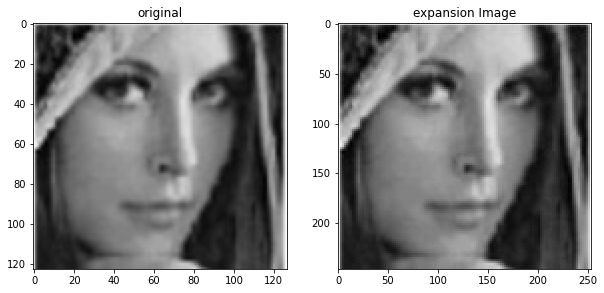

In [47]:
save_file = 'expansion_lenna.jpg'
cv2.imwrite(save_file, dst)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[0].set_title('original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('expansion Image')

# reverse thought(역방향 사상)
- 계단 현상을 줄일 수 있다

In [48]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

src= cv2.imread("expansion_lenna.jpg",0)

Ratio = 2

H,W = src.shape[:2]
H,W

H_dst,W_dst = int(H*Ratio),int(W*Ratio)

dst = np.zeros((H_dst,W_dst),dtype=np.uint8)

In [49]:
for h in range(H_dst):
    for w in range(W_dst):
        h_src = int(h/Ratio) 
        w_src = int(w/Ratio)
        dst[h,w] = src[h_src,w_src]

Text(0.5, 1.0, 'reverse Image')

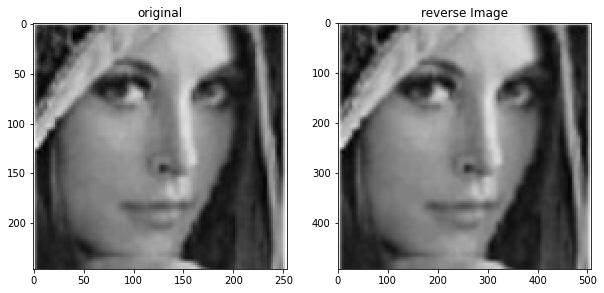

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[0].set_title('original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('reverse Image')

# interpolation(보간법)
- 역방향 사상에 의해 계산된 점 주위의 네 개의 화소들의 값에 가중치를 곱하여 합함

In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

src= cv2.imread("expansion_lenna.jpg",0)

Ratio = 2

H,W = src.shape[:2]
H,W

H_dst,W_dst = int(H*Ratio),int(W*Ratio)

dst = np.zeros((H_dst,W_dst),dtype=np.uint8)

In [4]:
for h in range(H_dst):
    for w in range(W_dst):
        w_src = w/Ratio
        h_src = h/Ratio
        alpha = w_src - int(w_src)
        beta = h_src - int(h_src)
        A_index = int(h_src), int(w_src) 
        B_index = int(h_src), min(int(w_src)+1,W-1)
        C_index = min(int(h_src)+1,H-1), int(w_src)
        D_index = min(int(h_src)+1,H-1), min(int(w_src)+1,W-1)
        
        E_value = (1-alpha)*src[A_index]+alpha*src[B_index]
        F_value = (1-alpha)*src[C_index]+alpha*src[D_index]
        X_value = (1-beta)*E_value+beta*F_value
        dst[h,w] = X_value

Text(0.5, 1.0, 'interpolation')

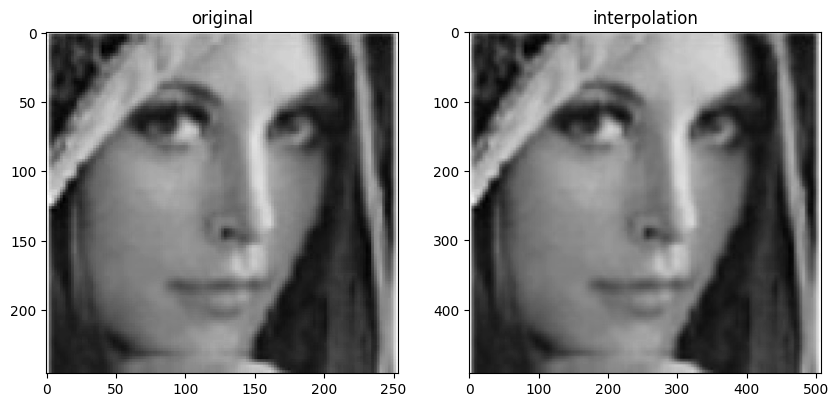

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[0].set_title('original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('interpolation')

축소(서브샘플링 방법 이용)

# 블러링

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

src_O = cv2.imread('reduction.jpg',0)
src = np.copy(src_O)
H,W = src_O.shape[:2]

mask_size = 3
mask = np.ones((mask_size,mask_size))/(mask_size**2) # 영상 좌우로 흔들린 사진 (1,3), 영상 상하로 흔들린 사진 (3,1) # 특수 회선 마스크가 아니라 계수의 합이 0이다
boundary = int ((mask_size -1) /2.0) 
# boundary = cv2.filter2D(src, -1, kernel = mask)

for h in range(boundary, H -boundary):
    for w in range(boundary, W - boundary):
        src_mask = src_O[h-boundary:h+boundary+1, w-boundary:w+boundary+1]
        src[h,w] = np.sum(mask * src_mask)

src = src.astype(np.uint8)

In [19]:

H,W = src.shape[:2]
H,W

Ratio = 1/2

H_dst,W_dst = int(H*Ratio),int(W*Ratio)
dst = np.zeros((int(Ratio*H),int(Ratio*W)),dtype=np.uint8)

idx_h_src = np.linspace(0,H-1,H_dst).astype(int)
idx_w_src = np.linspace(0,W-1,W_dst).astype(int)


In [20]:
# for h in range(H_dst):
#     for w in range(W_dst):
#        dst[h][w] = src[idx_h_src[h],idx_w_src[w]]
       
dst = src[idx_h_src][:,idx_w_src]
# B,A = np.meshgrid(idx_h_src,idx_w_src) 모든 경우의 수 또는 모든 조합을 출력해줌
# dst = src[A,B]

Text(0.5, 1.0, 'reduction')

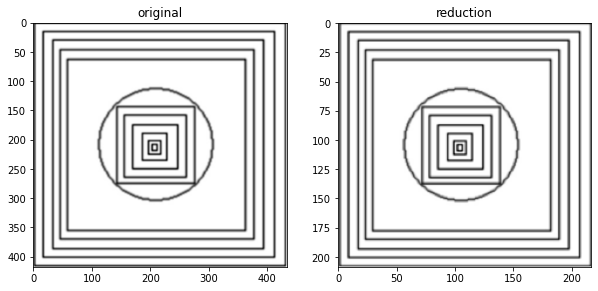

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[0].set_title('original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('reduction')

cv2.resize(src, dsize, dst=None, fx=None, fy=None, interpolation=None) -> dst

dsize = (w,h) - 정수로 들어가야하고 최종 크기를 넣어주면 됨, 튜플로 넣어줘야 함 기본값 (0,0)

fx, fy = ratio



# rotaion

In [1]:
H=100
W=200
def array_to_xy(point):
  y,x = point
  
  y=-y
  
  x=x-W/2
  y=y-H/2
  
  x,y =int(x),int(y)
  
  return(x,y)

In [2]:
array_to_xy((5,6))

(-94, -55)

In [3]:
def xy_to_array(point):
    x,y = point
    
    x=x+W/2
    y=y+H/2
    
    y=-y
    
    w,h = int(x),int(y)
    
    return(h,w)

In [4]:
X,Y= xy_to_array((-94, -55))
X,Y

(5, 6)

# Rotation code

In [75]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

src= cv2.imread("lenna.jpg",0)

degree = 30
radian = np.radians(degree)

dst = np.zeros_like(src)

H,W = dst.shape[:2]

# Reverse projection

In [76]:
for h in range(H):
    for w in range(W):
        x,y = array_to_xy((h,w))
        x_dst = x*np.cos(np.radians(degree)) + y*np.sin(np.radians(degree))
        y_dst = -x*np.sin(np.radians(degree)) + y*np.cos(np.radians(degree))
        h_src,w_src = xy_to_array((x_dst,y_dst))
        
        if h_src < H and h_src > 0 and w_src<W and w_src > 0:
            dst[h][w] = src[h_src][w_src]
        else:
            continue

Text(0.5, 1.0, 'Rotation')

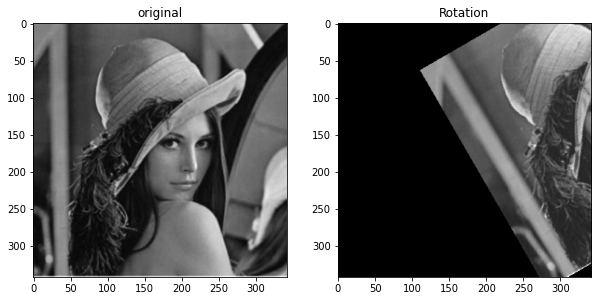

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].imshow(src, cmap = 'gray') 
axes[0].set_title('original')
axes[1].imshow(dst, cmap = 'gray')
axes[1].set_title('Rotation')

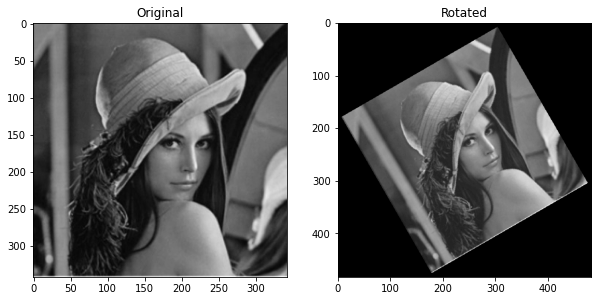

Time taken to rotate the image: 1.961010 seconds


In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.time()

# 이미지 읽기
src = cv2.imread("lenna.jpg", 0)  # '0'은 이미지를 흑백으로 읽음을 의미

# 회전 각도와 라디안 계산
degree = 30
radian = np.radians(degree)

# 입력 이미지의 높이와 너비
H, W = src.shape[:2]

# 회전에 따라 필요한 새 이미지의 크기 계산
diagonal = int(np.sqrt(H**2 + W**2))  # 대각선 길이 계산
dst = np.zeros((diagonal, diagonal), dtype=np.uint8)  # 회전된 이미지가 들어갈 새 배열

# 새 이미지의 높이와 너비
H_new, W_new = dst.shape[:2]

# 회전 축 (중심) 계산
cx, cy = W // 2, H // 2  # 원본 이미지의 중심
cx_new, cy_new = W_new // 2, H_new // 2  # 새 이미지의 중심

# 각 픽셀에 대해
for h in range(H_new):
    for w in range(W_new):
        # 새 이미지에서의 좌표를 원본 이미지의 좌표계로 변환
        x = (w - cx_new)
        y = (h - cy_new)
        
        # 회전된 위치 계산
        x_src = int(x * np.cos(radian) - y * np.sin(radian) + cx)
        y_src = int(x * np.sin(radian) + y * np.cos(radian) + cy)
        
        # 원본 이미지의 경계 내에 있는지 확인
        if 0 <= x_src < W and 0 <= y_src < H:
            dst[h, w] = src[y_src, x_src]
        else:
            dst[h, w] = 0  # 경계 밖 픽셀은 검은색으로 처리

# 결과 표시
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(src, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(dst, cmap='gray')
axes[1].set_title('Rotated')
plt.show()
end_time = time.time()
print(f"Time taken to rotate the image: {end_time - start_time:.6f} seconds")


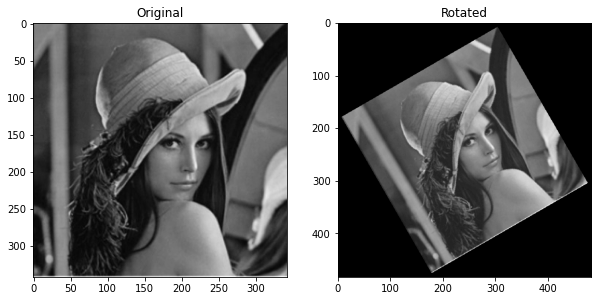

1716187360.7625892

In [83]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt


src = cv2.imread("lenna.jpg", 0)

def rotate_image(src, degree):
    radian = np.radians(degree)
    cos_angle, sin_angle = np.cos(radian), np.sin(radian)
    
    # Original image dimensions
    h, w = src.shape
    
    # Calculate new image dimensions
    diagonal = int(np.sqrt(h**2 + w**2))
    new_h, new_w = diagonal, diagonal
    
    # Output image
    dst = np.zeros((new_h, new_w), dtype=src.dtype)
    
    # Center of the image
    cx, cy = w // 2, h // 2
    cx_new, cy_new = new_w // 2, new_h // 2
    
    # Create a grid of indices
    x_new, y_new = np.meshgrid(np.arange(new_w), np.arange(new_h))
    
    # Shift grid to have center at the origin
    x_new -= cx_new
    y_new -= cy_new
    
    # Apply rotation
    x_old = cos_angle * x_new + sin_angle * y_new
    y_old = -sin_angle * x_new + cos_angle * y_new
    
    # Shift back to original image coordinates
    x_old += cx
    y_old += cy
    
    # Interpolation indices must be within the image boundaries
    x_old = np.clip(x_old, 0, w-1).astype(np.int32)
    y_old = np.clip(y_old, 0, h-1).astype(np.int32)
    
    # Map coordinates back to original image
    dst = src[y_old, x_old]

    return dst

rotate_image(src,30)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(src, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(dst, cmap='gray')
axes[1].set_title('Rotated')
plt.show()

time.time()

# CV2를 이용한 회전

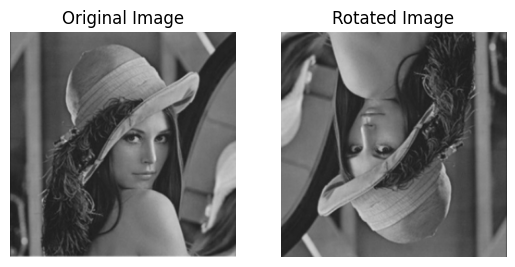

In [3]:
import cv2
import matplotlib.pyplot as plt

image_path = 'lenna.jpg'
image = cv2.imread(image_path,cv2.IMREAD_COLOR)

rotated_image = cv2.rotate(image, cv2.ROTATE_180)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')

plt.show()
